In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

C:\Users\afree\AppData\Local\Temp\ipykernel_1720\3255976665.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
nasaData = pd.read_csv('Datasets/nasa_data.csv') #importing the dataset which includes outliers and duplicates
nasaData.head()

NEO_REFERENCE_ID  EST_DIA_IN_M(MIN)  EST_DIA_IN_M(MAX)  \
0           3703080         127.219878         284.472297   
1           3723955         146.067964         326.617897   
2           2446862         231.502122         517.654482   
3           3092506           8.801465          19.680675   
4           3514799         127.219878         284.472297   

   RELATIVE_VELOCITY_KM_PER_SEC  MISS_DIST.(KILOMETERS)  PERIHELION_DISTANCE  \
0                      6.115834              62753692.0             0.808259   
1                     18.113985              57298148.0             0.718200   
2                      7.590711               7622911.5             0.950791   
3                     11.173875              42683616.0             0.983902   
4                      9.840831              61010824.0             0.967687   

   APHELION_DIST  PERIHELION_TIME  MEAN_ANOMALY  MEAN_MOTION  HAZARDOUS  
0       2.005764      2458161.642    264.837533     0.590551       True  
1       1.497352      2457794.969    173.741112     0.845330      False  
2       1.966857      2458120.468    292.893654     0.559371       True  
3       1.527904      2457902.337     68.741007     0.700277      False  
4       1.483543      2457814.455    135.142133     0.726395       True

In [4]:
#checking the vital statistics of the dataset
print("Data type : ", type(nasaData))
print("Data dims : ", nasaData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (4687, 11)


In [5]:
print(nasaData.dtypes) #checking the variables and their types

NEO_REFERENCE_ID                  int64
EST_DIA_IN_M(MIN)               float64
EST_DIA_IN_M(MAX)               float64
RELATIVE_VELOCITY_KM_PER_SEC    float64
MISS_DIST.(KILOMETERS)          float64
PERIHELION_DISTANCE             float64
APHELION_DIST                   float64
PERIHELION_TIME                 float64
MEAN_ANOMALY                    float64
MEAN_MOTION                     float64
HAZARDOUS                          bool
dtype: object


#### Exploring our Dataset 

In [6]:
# information about the Variables
nasaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NEO_REFERENCE_ID              4687 non-null   int64  
 1   EST_DIA_IN_M(MIN)             4687 non-null   float64
 2   EST_DIA_IN_M(MAX)             4687 non-null   float64
 3   RELATIVE_VELOCITY_KM_PER_SEC  4687 non-null   float64
 4   MISS_DIST.(KILOMETERS)        4687 non-null   float64
 5   PERIHELION_DISTANCE           4687 non-null   float64
 6   APHELION_DIST                 4687 non-null   float64
 7   PERIHELION_TIME               4687 non-null   float64
 8   MEAN_ANOMALY                  4687 non-null   float64
 9   MEAN_MOTION                   4687 non-null   float64
 10  HAZARDOUS                     4687 non-null   bool   
dtypes: bool(1), float64(9), int64(1)
memory usage: 370.9 KB


##### Through this dataset, we want to find out the impact risk for each asteroid based on its estimated diameter and relative velocity. We will be analysing the different variables present in this dataset other than estimated diameter(max) and relative velocity to see if they have any effect on impact risk. 

##### The formula we want to use to calculate impact risk is: Impact Risk = Estimated Diameter × Relative Velocity

In [7]:
#numeric predictors 
nasaData.describe()

NEO_REFERENCE_ID  EST_DIA_IN_M(MIN)  EST_DIA_IN_M(MAX)  \
count      4.687000e+03        4687.000000        4687.000000   
mean       3.272298e+06         204.604203         457.508906   
std        5.486011e+05         369.573402         826.391249   
min        2.000433e+06           1.010543           2.259644   
25%        3.097594e+06          33.462237          74.823838   
50%        3.514799e+06         110.803882         247.765013   
75%        3.690060e+06         253.837029         567.596853   
max        3.781897e+06       15579.552410       34836.938250   

       RELATIVE_VELOCITY_KM_PER_SEC  MISS_DIST.(KILOMETERS)  \
count                   4687.000000            4.687000e+03   
mean                      13.970811            3.841347e+07   
std                        7.293223            2.181110e+07   
min                        0.335504            2.660989e+04   
25%                        8.432865            1.995928e+07   
50%                       12.917889            3.964771e+07   
75%                       18.077649            5.746863e+07   
max                       44.633747            7.478160e+07   

       PERIHELION_DISTANCE  APHELION_DIST  PERIHELION_TIME  MEAN_ANOMALY  \
count          4687.000000    4687.000000     4.687000e+03   4687.000000   
mean              0.813383       1.987144     2.457728e+06    181.167927   
std               0.242059       0.951519     9.442264e+02    107.501623   
min               0.080744       0.803765     2.450100e+06      0.003191   
25%               0.630834       1.266059     2.457815e+06     87.006918   
50%               0.833153       1.618195     2.457973e+06    185.718889   
75%               0.997227       2.451171     2.458108e+06    276.531946   
max               1.299832       8.983852     2.458839e+06    359.917991   

       MEAN_MOTION  
count  4687.000000  
mean      0.738242  
std       0.342627  
min       0.086285  
25%       0.453289  
50%       0.712946  
75%       0.984669  
max       2.039000

In [8]:
#boolean predictor
nasaData[['HAZARDOUS']].describe()

HAZARDOUS
count       4687
unique         2
top        False
freq        3932

#### Predictors corresponding to Impact Risk: 

In [13]:
#calculate impact risk as the product of estimated diameter and relative velocity
nasaData['IMPACT RISK'] = (nasaData['EST_DIA_IN_M(MAX)'] - nasaData['EST_DIA_IN_M(MIN)']) * nasaData['RELATIVE_VELOCITY_KM_PER_SEC']

#create a new DataFrame with the required columns (removed neo ref ID since it is not a variable but just an identifier)
nasaDataEDA = nasaData[['EST_DIA_IN_M(MIN)', 'EST_DIA_IN_M(MAX)', 'RELATIVE_VELOCITY_KM_PER_SEC', 'MISS_DIST.(KILOMETERS)', 'PERIHELION_DISTANCE', 'APHELION_DIST', 'PERIHELION_TIME', 'MEAN_ANOMALY', 'MEAN_MOTION', 'HAZARDOUS', 'IMPACT RISK']]

print(nasaDataEDA)

      EST_DIA_IN_M(MIN)  EST_DIA_IN_M(MAX)  RELATIVE_VELOCITY_KM_PER_SEC  \
0            127.219878         284.472297                      6.115834   
1            146.067964         326.617897                     18.113985   
2            231.502122         517.654482                      7.590711   
3              8.801465          19.680675                     11.173875   
4            127.219878         284.472297                      9.840831   
...                 ...                ...                           ...   
4682          44.111820          98.637028                     22.154265   
4683           6.089126          13.615700                      3.225150   
4684          76.657557         171.411509                      7.191642   
4685         116.025908         259.441818                     11.352090   
4686         400.640618         895.859655                     35.946852   

      MISS_DIST.(KILOMETERS)  PERIHELION_DISTANCE  APHELION_DIST  \
0               6.2

#### Comparing the different variables with Impact Risk: (with outliers)

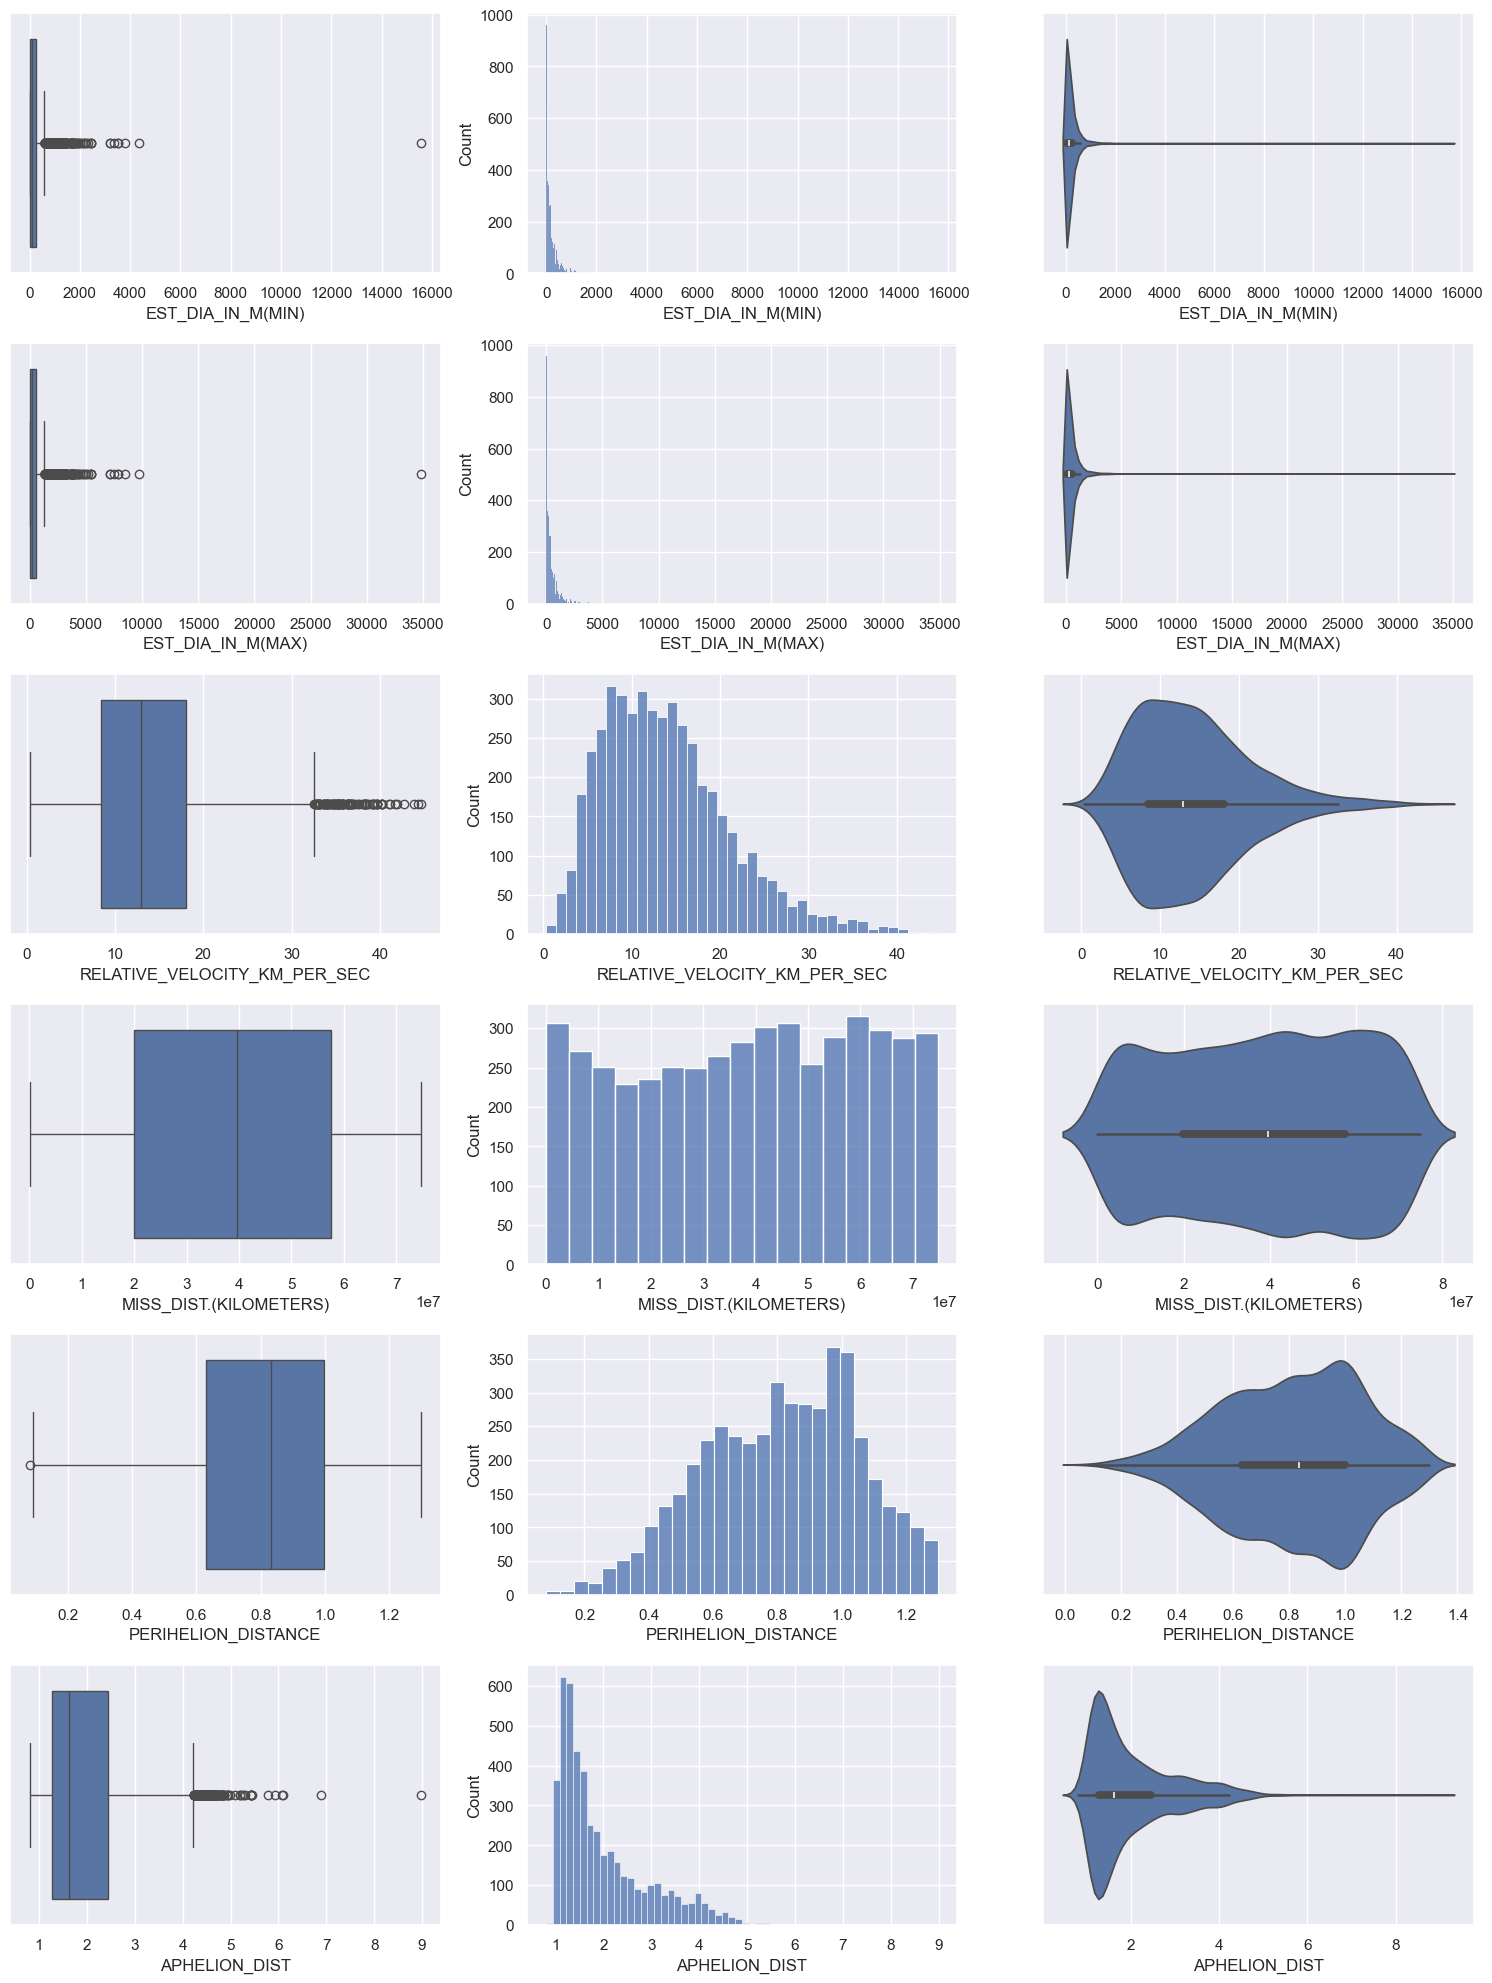

In [14]:
#subplots 
fig, axes = plt.subplots(6, 3, figsize=(15, 20))

for count, var in enumerate(nasaDataEDA):
    #check if count exceeds the number of rows in axes
    if count < axes.shape[0]:
        sb.boxplot(data=nasaDataEDA[var], orient="h", ax=axes[count, 0])
        sb.histplot(data=nasaDataEDA[var], ax=axes[count, 1])
        sb.violinplot(data=nasaDataEDA[var], orient="h", ax=axes[count, 2])
    else:
        break

plt.tight_layout()
plt.show()

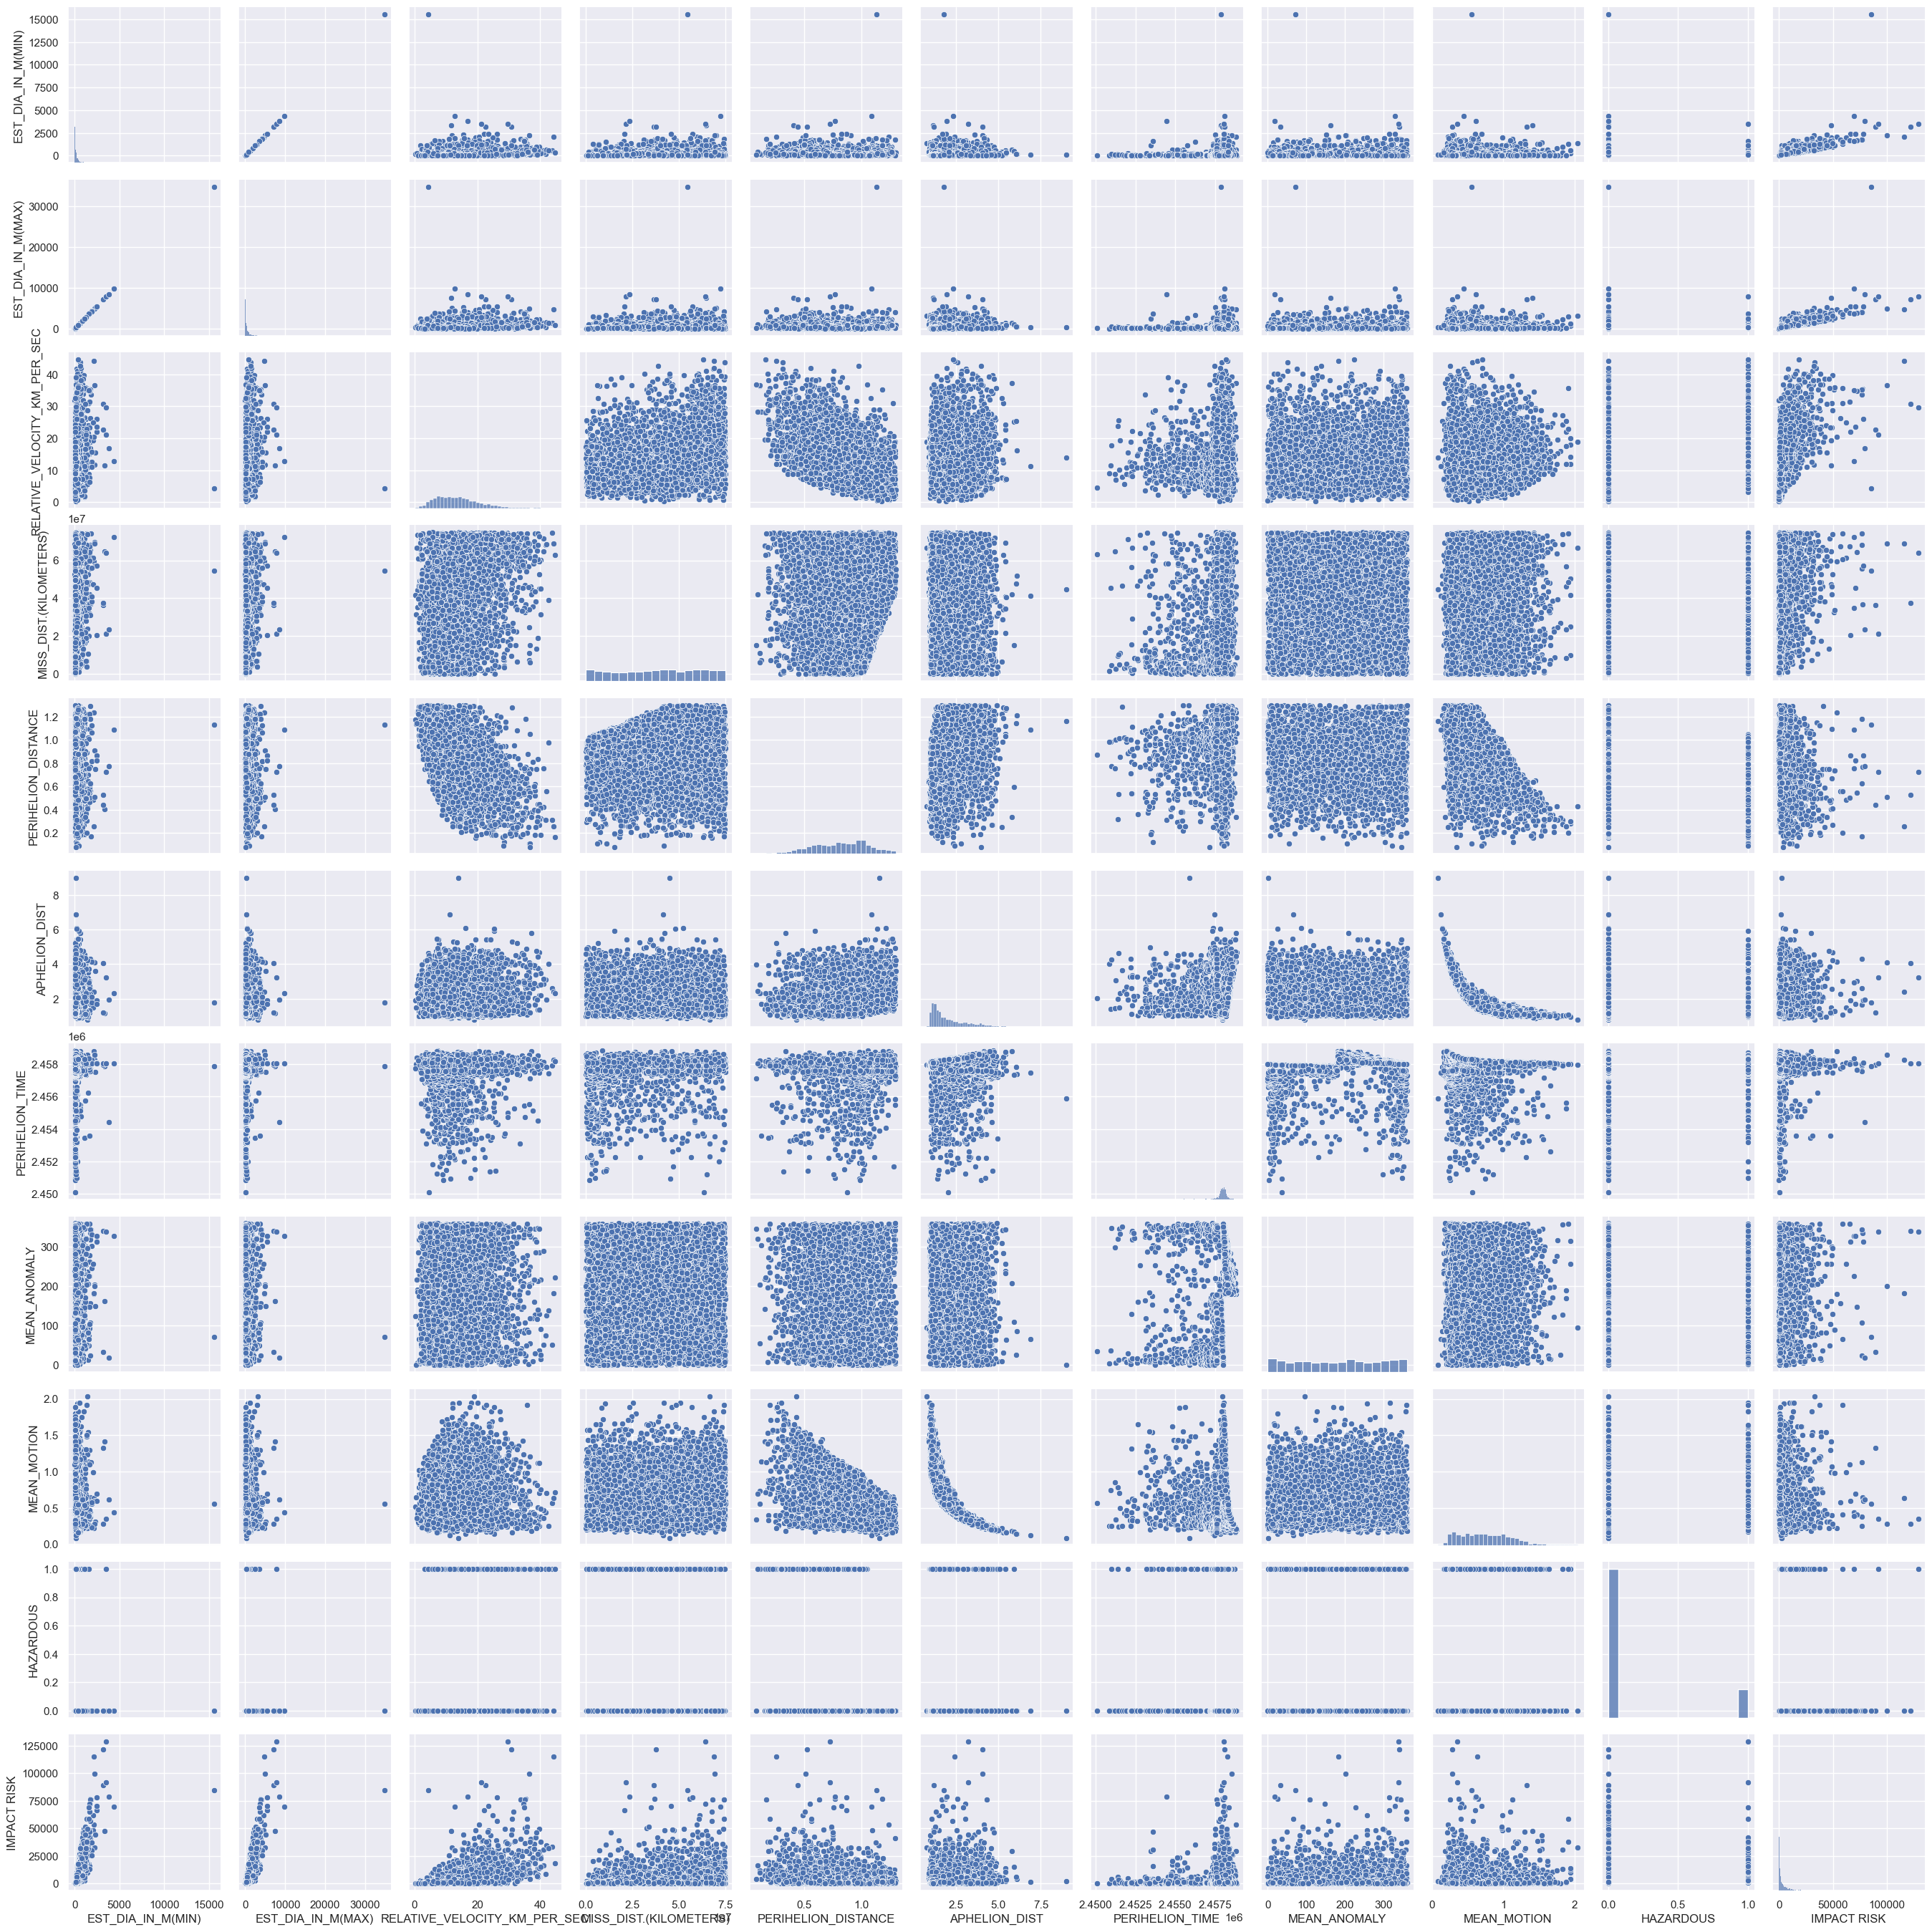

In [15]:
#pairplot
#draw pairs of variables against one another
sb.pairplot(data = nasaDataEDA) 

C:\Users\afree\AppData\Local\Temp\ipykernel_1720\1707449881.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=impact_risk_correlation.index, y=impact_risk_correlation.values, palette='coolwarm')


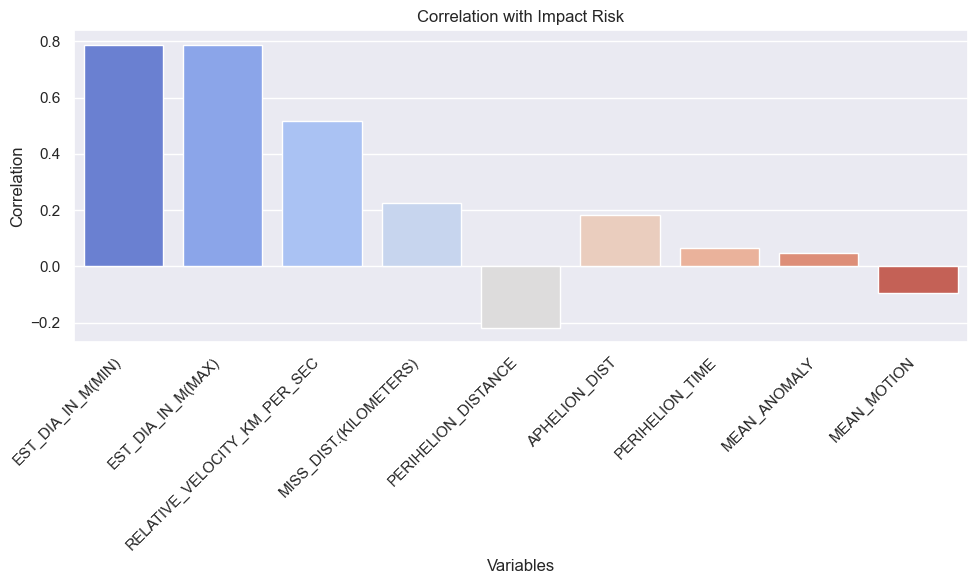

In [16]:
variables_to_compare = ['EST_DIA_IN_M(MIN)', 'EST_DIA_IN_M(MAX)', 'RELATIVE_VELOCITY_KM_PER_SEC', 'MISS_DIST.(KILOMETERS)', 'PERIHELION_DISTANCE', 'APHELION_DIST', 'PERIHELION_TIME', 'MEAN_ANOMALY', 'MEAN_MOTION']  

variables_to_compare.append('IMPACT RISK')

corr_matrix = nasaDataEDA[variables_to_compare].corr()

impact_risk_correlation = corr_matrix['IMPACT RISK'].drop('IMPACT RISK')

#plot the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=impact_risk_correlation.index, y=impact_risk_correlation.values, palette='coolwarm')
plt.title('Correlation with Impact Risk')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### The above correlation bar plot shows that estimated diameter(min and max) have a strong positive correlation with impact risk. This is followed by relative velocity which also has a fairly positive correlation with impact risk as compared to the other variables.

##### We will be using estimated diameter(max) in the calculation as both the min and max values have the same correlation and the max value of the diameter would provide a better range. 

##### Therefore, we can conclude that the variables that affect impact risk the most is estimated diameter(max) and relative velocity so we will be using these 2 variables for further analysis. 

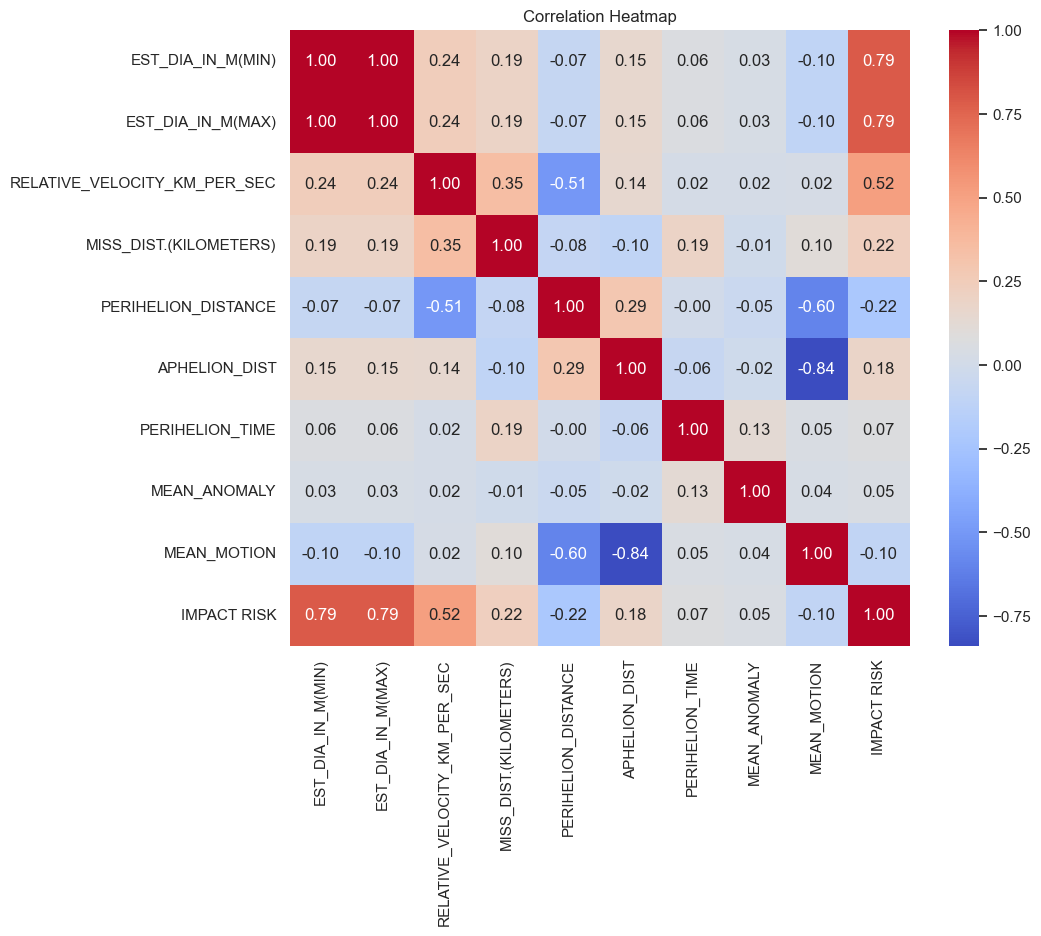

In [21]:
#plot heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### By plotting this heatmap, we are able to find a more accurate value for correlation and it can be seen that the correlation between impact risk and estimated diameter(max) is 0.79 and the correlation between impact risk and relative velocity is 0.52 which are the variables where the correlation is closer to 1. 

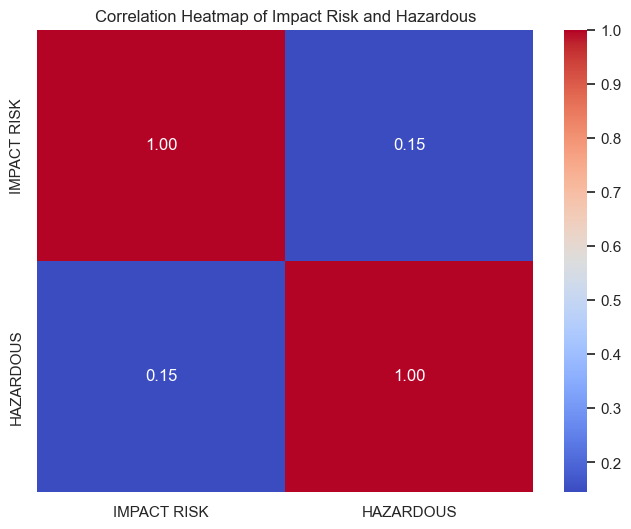

In [20]:
#heatmap
plt.figure(figsize=(8, 6))
heatmap_data = nasaDataEDA[['IMPACT RISK', 'HAZARDOUS']].corr()
sb.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap of Impact Risk and Hazardous')

plt.show()

##### This heatmap shows a strong negative correlation between impact risk and an asteroid being hazardous. 

#### Should we keep this eda because most of the eda is still the same as with the outliers 

In [22]:
nasaDataNoOutliers = pd.read_csv('Datasets/nasa_data_without_outliers.csv') 
nasaDataNoOutliers.head()

NEO_REFERENCE_ID  EST_DIA_IN_M(MIN)  EST_DIA_IN_M(MAX)  \
0           3703080         127.219878         284.472297   
1           3723955         146.067964         326.617897   
2           2446862         231.502122         517.654482   
3           3092506           8.801465          19.680675   
4           3514799         127.219878         284.472297   

   RELATIVE_VELOCITY_KM_PER_SEC  MISS_DIST.(KILOMETERS)  PERIHELION_DISTANCE  \
0                      6.115834              62753692.0             0.808259   
1                     18.113985              57298148.0             0.718200   
2                      7.590711               7622911.5             0.950791   
3                     11.173875              42683616.0             0.983902   
4                      9.840831              61010824.0             0.967687   

   APHELION_DIST  PERIHELION_TIME  MEAN_ANOMALY  MEAN_MOTION  HAZARDOUS  
0       2.005764      2458161.642    264.837533     0.590551       True  
1       1.497352      2457794.969    173.741112     0.845330      False  
2       1.966857      2458120.468    292.893654     0.559371       True  
3       1.527904      2457902.337     68.741007     0.700277      False  
4       1.483543      2457814.455    135.142133     0.726395       True

#### Exploring dataset that has no outliers or duplicates 

In [26]:
#numeric predictors 
nasaDataNoOutliers.describe()

NEO_REFERENCE_ID  EST_DIA_IN_M(MIN)  EST_DIA_IN_M(MAX)  \
count      3.720000e+03        3720.000000        3720.000000   
mean       3.327101e+06         146.757673         328.160132   
std        5.027283e+05         138.982980         310.775390   
min        2.003362e+06           1.838887           4.111876   
25%        3.152145e+06          31.956189          71.456210   
50%        3.549694e+06         101.054342         225.964377   
75%        3.704768e+06         221.082810         494.356193   
max        3.781897e+06         581.507040        1300.289270   

       RELATIVE_VELOCITY_KM_PER_SEC  MISS_DIST.(KILOMETERS)  \
count                   3720.000000            3.720000e+03   
mean                      13.198373            3.950012e+07   
std                        6.441005            2.125261e+07   
min                        0.335504            3.405277e+04   
25%                        8.103858            2.223508e+07   
50%                       12.430261            4.093345e+07   
75%                       17.272530            5.785537e+07   
max                       32.531890            7.478160e+07   

       PERIHELION_DISTANCE  APHELION_DIST  PERIHELION_TIME  MEAN_ANOMALY  \
count          3720.000000    3720.000000     3.720000e+03   3720.000000   
mean              0.817918       1.816579     2.457991e+06    182.988187   
std               0.232307       0.771549     1.939320e+02    104.105540   
min               0.092784       0.894044     2.457388e+06      0.003191   
25%               0.641862       1.239227     2.457875e+06     93.098219   
50%               0.833180       1.520557     2.457999e+06    187.701988   
75%               0.993849       2.187179     2.458114e+06    274.874792   
max               1.298823       4.226339     2.458547e+06    359.841130   

       MEAN_MOTION  
count  3720.000000  
mean      0.775183  
std       0.322081  
min       0.217286  
25%       0.505981  
50%       0.759803  
75%       1.006983  
max       1.764777

In [27]:
#boolean predictor
nasaDataNoOutliers[['HAZARDOUS']].describe()

HAZARDOUS
count       3720
unique         2
top        False
freq        3134

#### Predictors corresponding to Impact Risk (Response)

In [28]:
#calculate impact risk as the product of estimated diameter and relative velocity
nasaDataNoOutliers['IMPACT RISK'] = (nasaDataNoOutliers['EST_DIA_IN_M(MAX)'] - nasaDataNoOutliers['EST_DIA_IN_M(MIN)']) * nasaDataNoOutliers['RELATIVE_VELOCITY_KM_PER_SEC']

#create a new DataFrame with the required columns (removed neo ref ID since it is not a variable)
nasaDataNoOutliersEDA = nasaDataNoOutliers[['EST_DIA_IN_M(MIN)', 'EST_DIA_IN_M(MAX)', 'RELATIVE_VELOCITY_KM_PER_SEC', 'MISS_DIST.(KILOMETERS)', 'PERIHELION_DISTANCE', 'APHELION_DIST', 'PERIHELION_TIME', 'MEAN_ANOMALY', 'MEAN_MOTION', 'HAZARDOUS', 'IMPACT RISK']]

print(nasaDataNoOutliersEDA)

      EST_DIA_IN_M(MIN)  EST_DIA_IN_M(MAX)  RELATIVE_VELOCITY_KM_PER_SEC  \
0            127.219878         284.472297                      6.115834   
1            146.067964         326.617897                     18.113985   
2            231.502122         517.654482                      7.590711   
3              8.801465          19.680675                     11.173875   
4            127.219878         284.472297                      9.840831   
...                 ...                ...                           ...   
3715         192.555078         430.566244                     26.016058   
3716          44.111820          98.637028                     22.154265   
3717           6.089126          13.615700                      3.225150   
3718          76.657557         171.411509                      7.191642   
3719         116.025908         259.441818                     11.352090   

      MISS_DIST.(KILOMETERS)  PERIHELION_DISTANCE  APHELION_DIST  \
0               6.2

#### Comparing the different variables with Impact Risk:

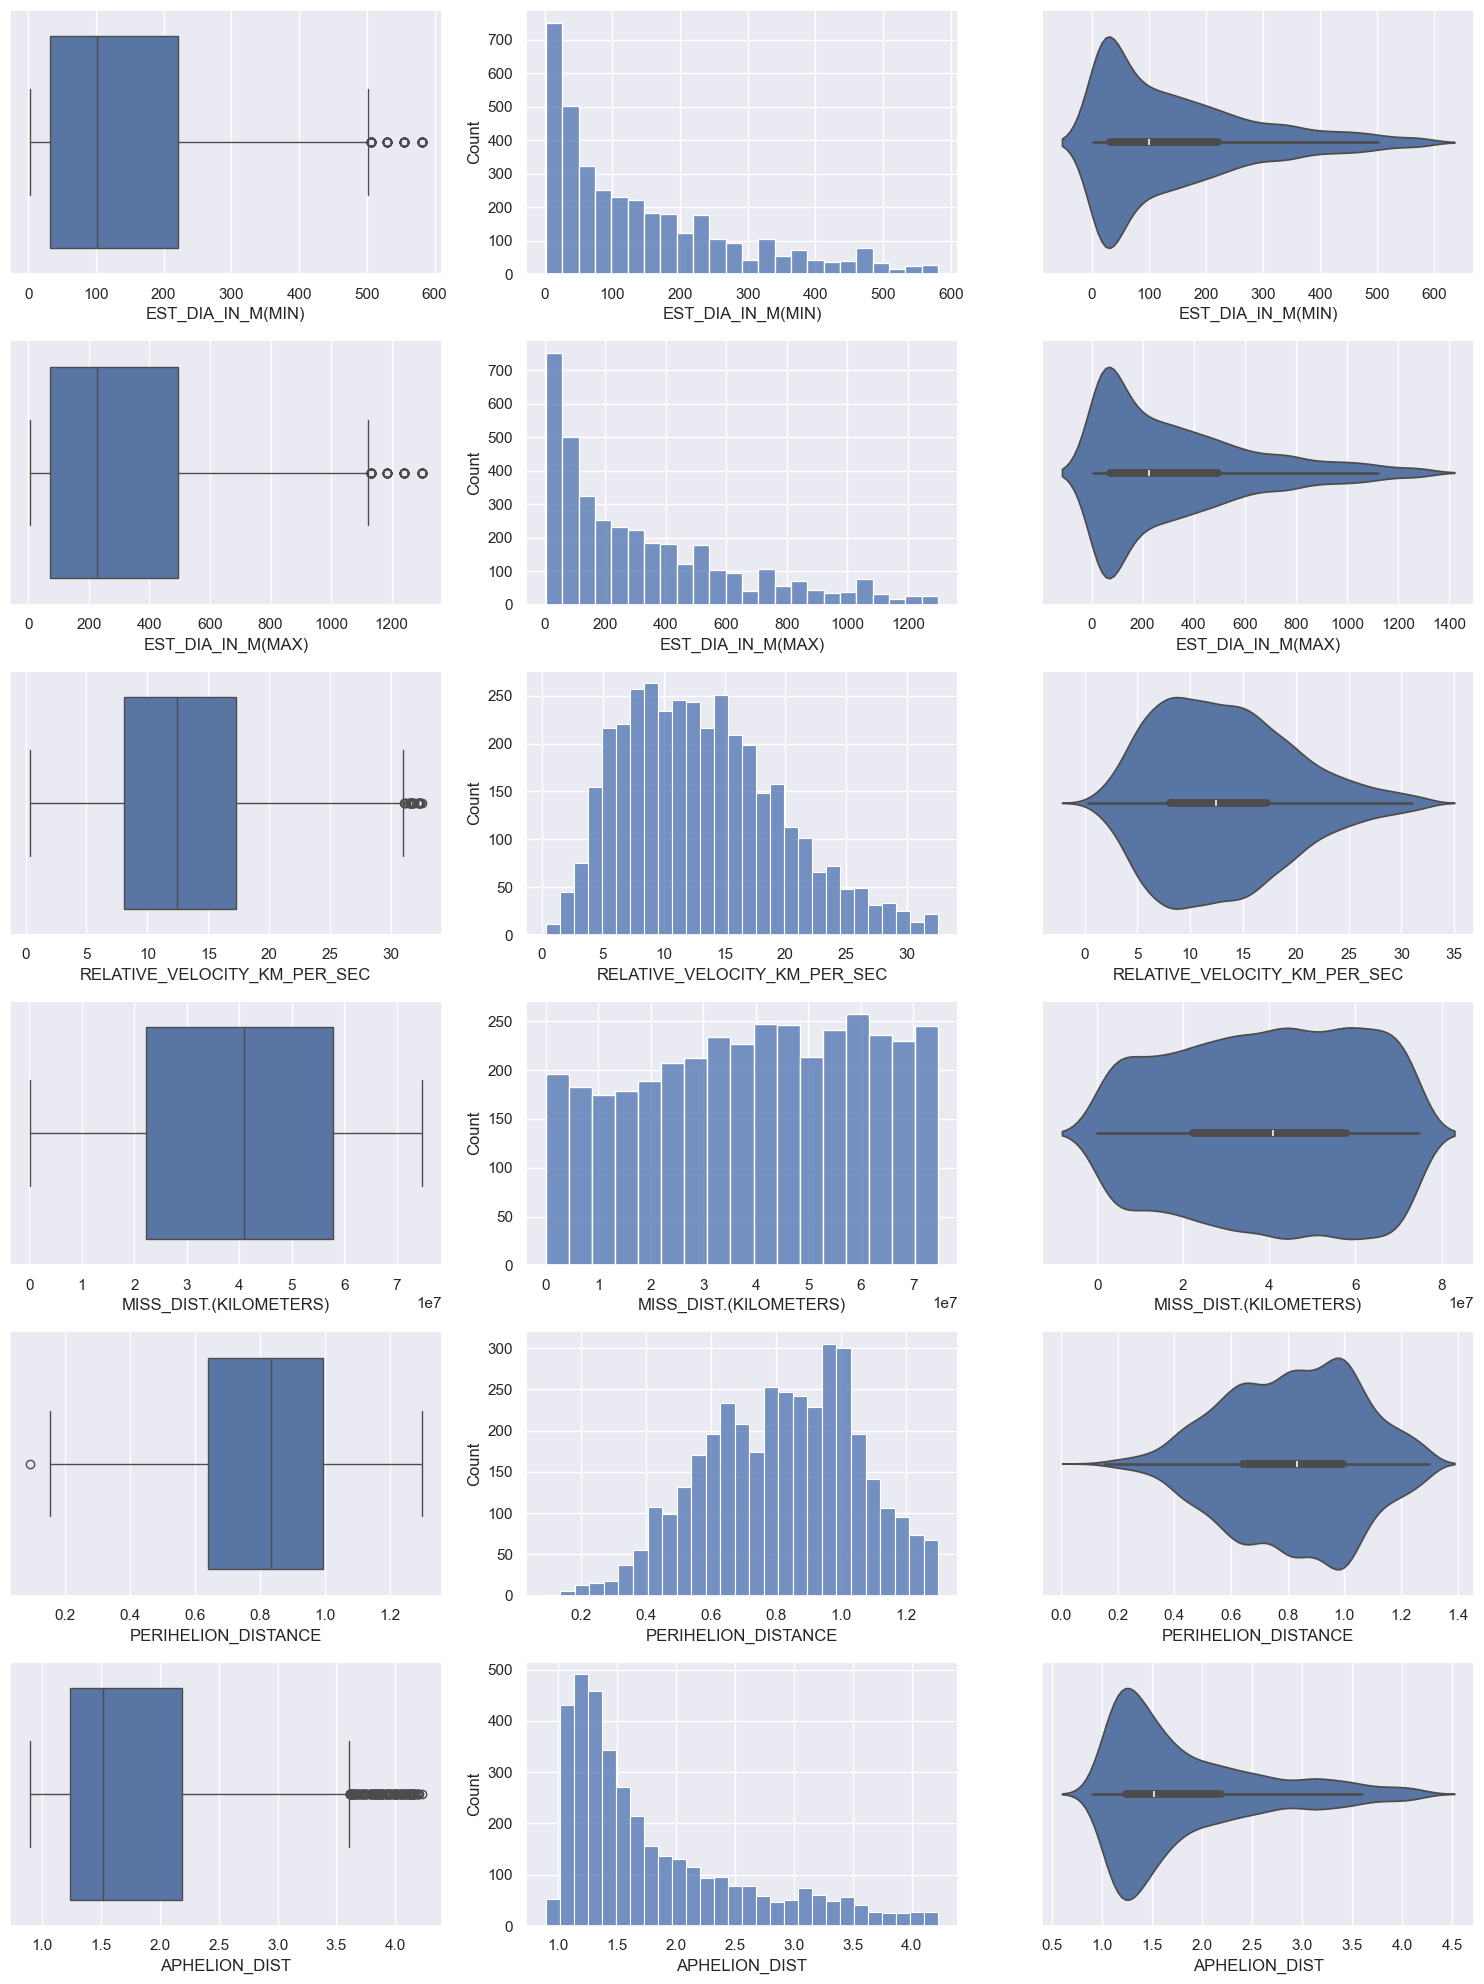

In [29]:
#subplots 
fig, axes = plt.subplots(6, 3, figsize=(15, 20))

for count, var in enumerate(nasaDataNoOutliersEDA):
    #check if count exceeds the number of rows in axes
    if count < axes.shape[0]:
        sb.boxplot(data=nasaDataNoOutliersEDA[var], orient="h", ax=axes[count, 0])
        sb.histplot(data=nasaDataNoOutliersEDA[var], ax=axes[count, 1])
        sb.violinplot(data=nasaDataNoOutliersEDA[var], orient="h", ax=axes[count, 2])
    else:
        break

plt.tight_layout()
plt.show()

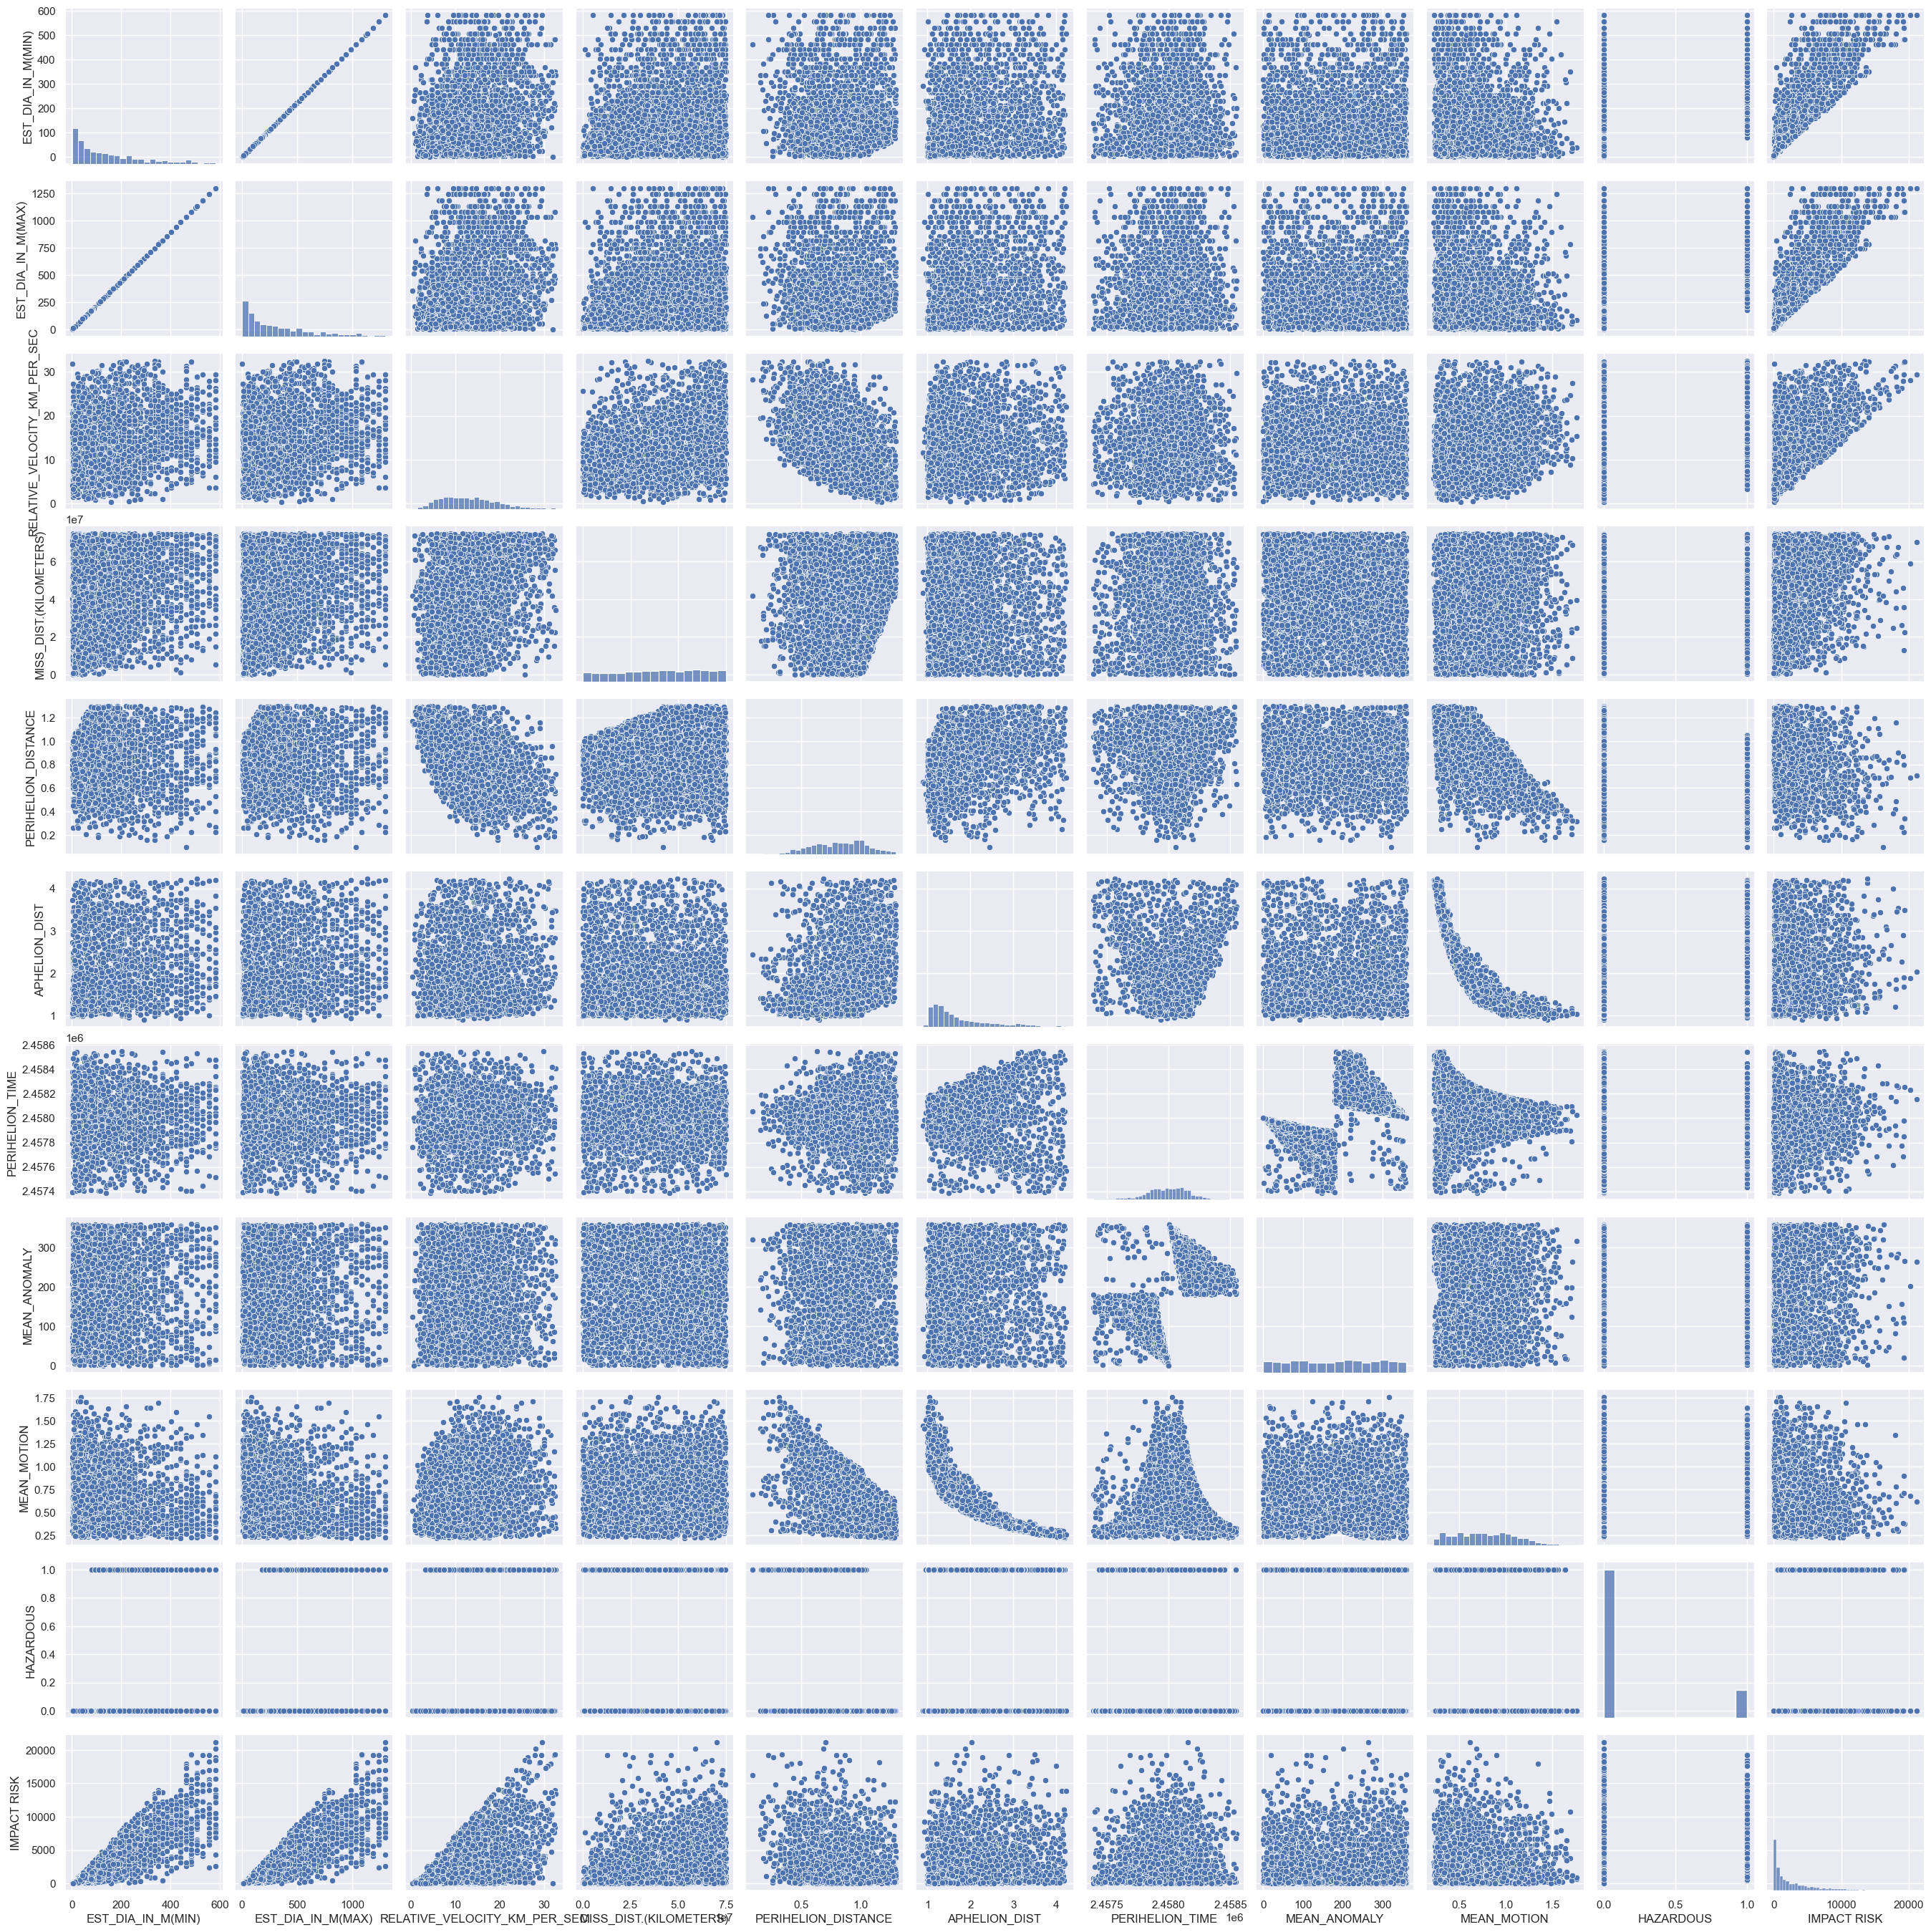

In [30]:
#pairplot
#draw pairs of variables against one another
sb.pairplot(data = nasaDataNoOutliersEDA) 

C:\Users\afree\AppData\Local\Temp\ipykernel_1720\274459306.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=impact_risk_correlation.index, y=impact_risk_correlation.values, palette='coolwarm')


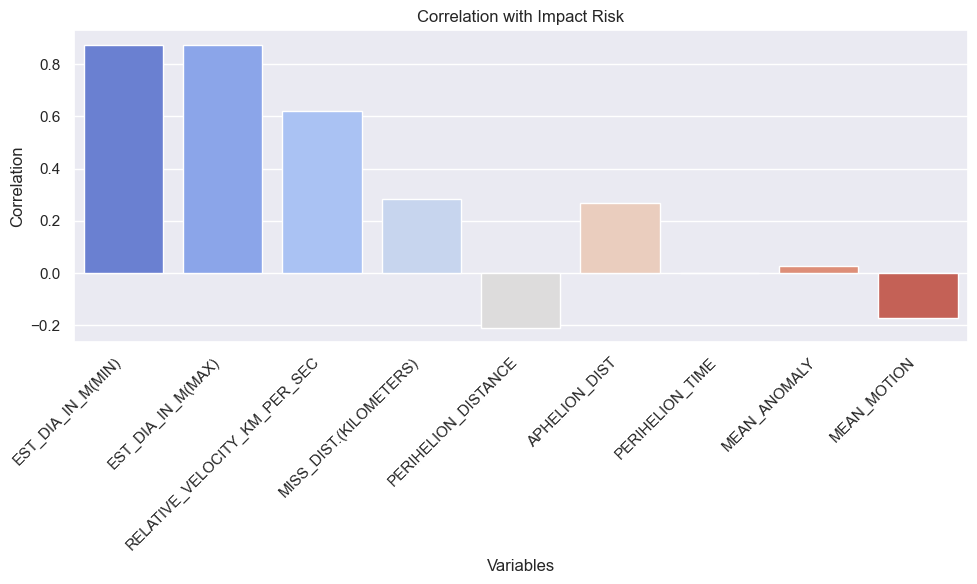

In [31]:
variables_to_compare = ['EST_DIA_IN_M(MIN)', 'EST_DIA_IN_M(MAX)', 'RELATIVE_VELOCITY_KM_PER_SEC', 'MISS_DIST.(KILOMETERS)', 'PERIHELION_DISTANCE', 'APHELION_DIST', 'PERIHELION_TIME', 'MEAN_ANOMALY', 'MEAN_MOTION']  

variables_to_compare.append('IMPACT RISK')

corr_matrix = nasaDataNoOutliersEDA[variables_to_compare].corr()

impact_risk_correlation = corr_matrix['IMPACT RISK'].drop('IMPACT RISK')

#plot the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=impact_risk_correlation.index, y=impact_risk_correlation.values, palette='coolwarm')
plt.title('Correlation with Impact Risk')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

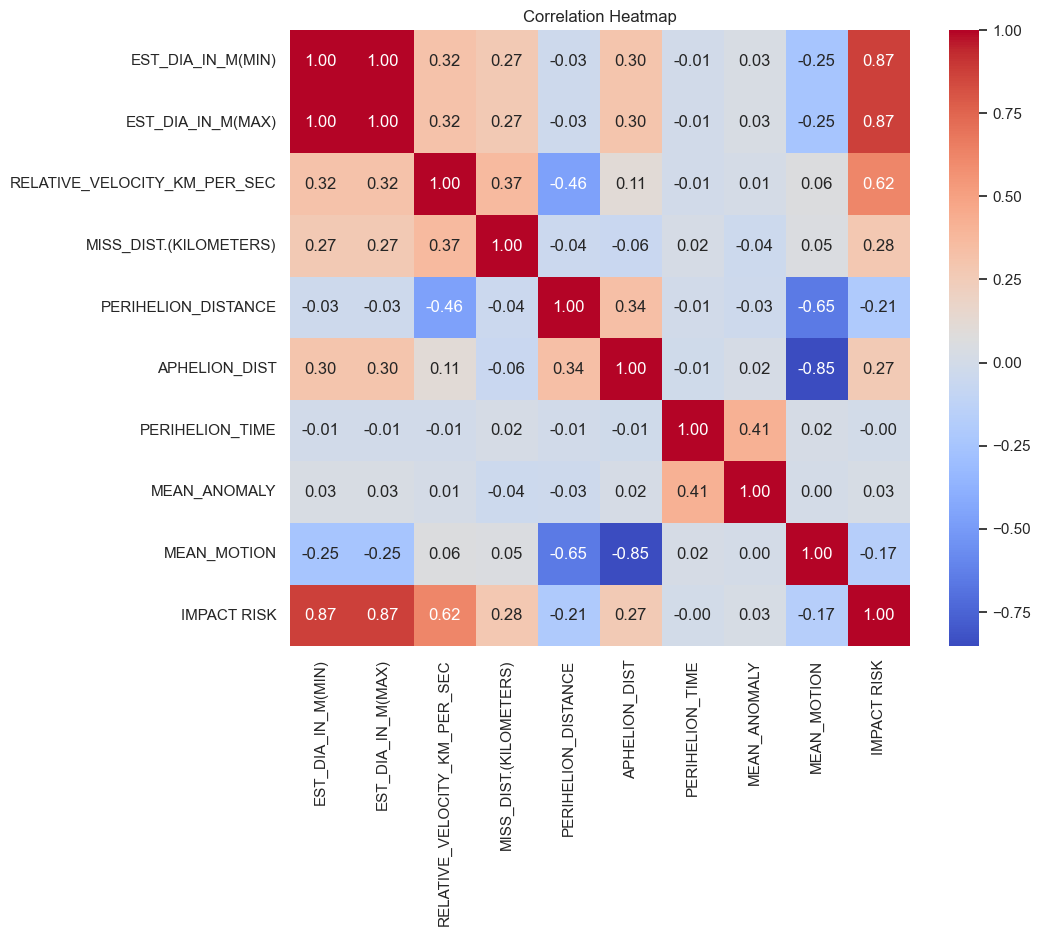

In [32]:
#plot heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

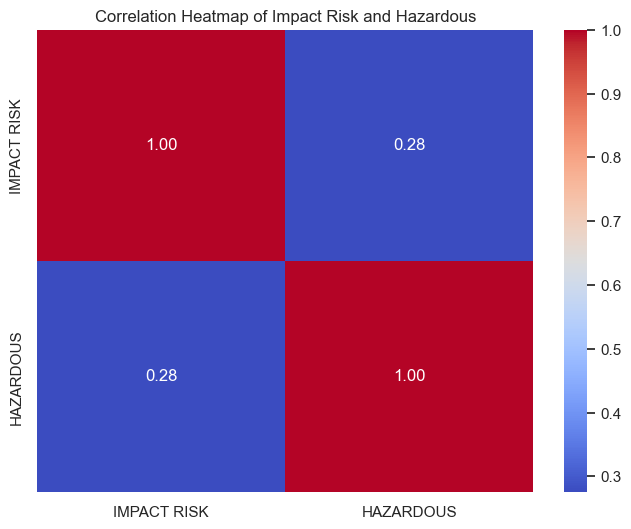

In [34]:
#heatmap
plt.figure(figsize=(8, 6))
heatmap_data = nasaDataNoOutliersEDA[['IMPACT RISK', 'HAZARDOUS']].corr()
sb.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap of Impact Risk and Hazardous')

plt.show()